<a href="https://colab.research.google.com/github/javadvahid/ML-course/blob/main/ML_course_project_5_neural_network_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks - multiclass classification
# Forward propagation and backward propagation


# دسته بندی چند کلاسه با استفاده از شبکه های عصبی


در این پروژه هدف تشخیص عدد موجود در تصویر می باشد

:مشخصات دیتا

دیتای ورودی : تصاویر از اعداد دست نویس در ابعاد 20 در 20


دیتای خروجی : شماره موجود در تصویر (0 تا 9)

<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=1sxVH40ipiXH_93wev5YHY0xgx4Y5dkeJ">
</p>

در این پروژه قصد ما آموزش کامل یک شبکه عصبی می باشد

البته شبکه عصبی نشان داده شده در اسلاید یک نمونه هست و ما در این پروژه یک شبکه با 3 لایه آموزش میدهیم

ولی تعداد نورون ها متفاوت می باشد

با توجه به این ابعاد تصاویر تعداد نورون در لایه ورودی 20*20 = 400 در نظر گرفته می شود

لایه میانی 25 نورون

لایه خروجی 10 نورون چون 10 کلاس متفاوت داریم

لایه میانی را می توانید مقادیر دلخواه خودتون را امتحان کنید


In [ ]:
#load data set from project4data1.mat file
#ذخیره شده است .mat تصاویر در یک فایل با فرمت 
#first upload project4data1.mat to colab
#ابتدا فایل مربوطه را در این محیط آپلود کرده
#load the .mat file using scipy library
#تصاویر را در یک متغیر لود می کنیم scipy با استفاده از کتابخانه 

from scipy.io import loadmat

data = loadmat('/content/drive/MyDrive/ml-projects/week4/project4data1.mat')



In [ ]:
#split the data into input X and output Y
#داده ها ی ورودی و خروجی را در دو متغیر جدا میریزیم
#input feature
X = data['X']
#output
Y = data['y']

#find m
m = Y.shape[0]
print(m)

5000


In [ ]:
print(X.shape, Y.shape)

(5000, 400) (5000, 1)


# Data Visualization:

# نمایش داده ها

Text(0.5, 1.0, '[5]')

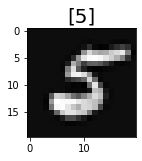

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

#choose the index of image to show
#انتخاب شماره عکسی که میخواهیم نمایش دهیم
idx = 2600

#choose figure size
#انتخاب سایز نمودار
plt.figure(figsize=(20,2))

#convert shape of iamge from (400,) to (20, 20) and display it
plt.imshow(np.reshape(X[idx], (20, 20)).T, cmap='gray')
#add the label of image as the title of figure
#لیبل عکس را به عنوان تیتر بالای تصویر چاپ کنید
plt.title(str(Y[idx]), fontsize = 20)



In [ ]:
#print shapes of X and Y
print("shape of X:", X.shape)
print("shape of X[idx]:", X[idx].shape)
print("shape of Y:", Y.shape)


shape of X: (5000, 400)
shape of X[idx]: (400,)
shape of Y: (5000, 1)


# creating X and Y matrices with the right dimensions as shown in the slide

# دقیقا به صورتی که در اسلاید زیر نمایش داده شده است X,Y ایجاد ماتریس

<p align="center" width="100%">
    <img width="50%" src="https://drive.google.com/uc?id=1wlGw9Mm6WJge83NeAtrn6jokvE6iShfU">
</p>

In [ ]:
#Convert dimension X from (m, n) to (n, m)
X = np.transpose(X)
X.shape

(400, 5000)

In [ ]:
#Convert dimension Y from (m, 1) to (1, m)
Y = np.transpose(Y)
Y.shape

(1, 5000)

In [ ]:
#add x0=1 to all the data 
#به همه داده ها x0=1 اضافه کردن 
X = np.concatenate([np.ones((1, m)), X], axis=0)
X.shape

(401, 5000)

# implementing forward propagation and Cost function and backward propagation




# پیاده سازی تابع هزینه

از اسلاید های زیر برای پیاده سازی استفاده کنید

# Cost function :

<p align="center" width="100%">
    <img width="90%" src="https://drive.google.com/uc?id=1XWDgewq8n0x0HvhrYzbf0BGTygNtNLzp">
</p>



In [ ]:
Y[0,1600]

3

In [ ]:
#convert Y from integer to one hot encoding as show in the cost function slide
#تبدیل لیبل های خروجی از یک عدد صحیح به برداری با ابعاد 10  
Y_onehot = np.eye(10)[Y].T
print(Y)
print(Y_onehot.shape)

[[0 0 0 ... 9 9 9]]
(10, 5000, 1)


In [ ]:
Y_onehot = Y_onehot[:,:,0]
print(Y_onehot.shape)


(10, 5000)


In [ ]:
Y[:,4995:5000]

array([[9, 9, 9, 9, 9]], dtype=uint8)

In [ ]:
#check one example of output
Y_onehot[:, 4995:5000]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.]])

In [ ]:
#create a function for sigmoid g = 1/(1 + e^-x)
#ابتدا تابع سیگموید را پیاده سازی کنید
def sigmoid(x):
  g = 1/(1+np.exp(-x))
  return g
  

# implementing forward propagation and Cost function and backward propagation




# پیاده سازی تابع هزینه

از اسلاید های زیر برای پیاده سازی استفاده کنید

# Cost function :

<p align="center" width="100%">
    <img width="90%" src="https://drive.google.com/uc?id=1XWDgewq8n0x0HvhrYzbf0BGTygNtNLzp">
</p>

# forward propagation :

<p align="center" width="100%">
    <img width="70%" src="https://drive.google.com/uc?id=1JxaspKCiuROiDGniQXQuZfHQlJ1zJNpO">
</p>


# Back propagation :

توجه کنید که در این اسلاید مطالببرای یک شبکه 4 لایه ای آورده شده است

شبکه ای که ما پیاده سازی می کنیم 3 لایه دارد


<p align="center" width="100%">
    <img width="90%" src="https://drive.google.com/uc?id=1wDduQtO4dF4L66TBppaMijP38lnhqX3D">
</p>

# delta formula

<p align="center" width="100%">
    <img width="90%" src="https://drive.google.com/uc?id=12Jz8Alu8kXeXwzFyprewhK6FPW7uNYin">
</p>

In [ ]:
#we are implementing a 3 layer neural network so we have 2 matrices for weights theta1 and theta 2
def nnCostGrad(X, Y_onehot, theta1, theta2, lambda_):
  m = X.shape[1]
  sumCost_m = 0
  theta1temp = theta1.copy()
  theta2temp = theta2.copy()
  theta1_grad = np.zeros(theta1.shape)
  theta2_grad = np.zeros(theta2.shape)
  for i in range(m):
    #bias term added before
    a1 = X[:, i]

    z2 = np.matmul(theta1temp, a1)
    a2 = sigmoid(z2)

    #add bias term
    a2 = np.concatenate([np.ones((1)), a2], axis=0)

    z3 = np.matmul(theta2temp, a2)
    a3 = sigmoid(z3)

    sumCost_m = sumCost_m + Y_onehot[:, i] * np.log(a3) + (1-Y_onehot[:, i]) * np.log(1-a3)


    delta3 = a3 - Y_onehot[:, i]
    
    delta2 = np.matmul(theta2temp.T, delta3) * (a2 * (1 - a2))
    delta2 = delta2[1:]
    delta2 = delta2.reshape((delta2.shape[0], 1))
    a1 = a1.reshape((a1.shape[0], 1))
    #print(delta2.shape, a1.shape)
    theta1_grad = theta1_grad + np.matmul(delta2, a1.T) 
    

    
    delta3 = delta3.reshape((delta3.shape[0], 1))
    a2 = a2.reshape((a2.shape[0], 1))
    theta2_grad = theta2_grad + np.matmul(delta3, a2.T)

  #compute CostFunction  
  sumCost_m_k = np.sum(sumCost_m, axis=0)

  cost = (-1/m) * sumCost_m_k + (lambda_/(2*m)) * (np.sum(theta1temp[:, 1:]**2) + np.sum(theta2temp[:,1:]**2))  
  
  #add regularization
  theta1_grad[:,1:] = theta1_grad[:, 1:] + lambda_ * theta1temp[:,1:]

  #add regularization
  theta2_grad[:,1:] = theta2_grad[:, 1:] + lambda_ * theta2temp[:,1:]

  #print((lambda_/(2*m)) * (np.sum(np.sum(theta1temp)) + np.sum(np.sum(theta2temp))))
  #print((-1/m) * sumCost_m_k )
  theta1_grad = theta1_grad/m

  theta2_grad = theta2_grad/m

  return cost, theta1_grad, theta2_grad


  

In [ ]:
# train neural network using 100 epochs
def train(X, Y_onehot, nnCostGrad, theta1, theta2, epochs, lr, lambda_):
  J_history=[]
  for epoch in range(epochs):
    cost, theta1_grad, theta2_grad = nnCostGrad(X, Y_onehot, theta1, theta2, lambda_)

    theta1 = theta1 - lr * theta1_grad
    theta2 = theta2 - lr * theta2_grad
    J_history.append(cost)
    print("cost at epoch {} : {}".format(epoch, cost))
  return theta1, theta2, J_history


# Random initialization

<p align="center" width="100%">
    <img width="90%" src="https://drive.google.com/uc?id=183ZUx4A48ALauAXynSKLdhdYBnbVNAAm">
</p>

In [ ]:
#random initialization
#input layers neurons: 400 = 20 x 20 
in_layer_size = 400
#hidden layer neurons: 25
hid_layer_size = 25
#output layer neurons: 10 (number of classes)
out_layer_size = 10
eps = .1
theta1 = np.random.rand(hid_layer_size, in_layer_size + 1) * (2*eps) - eps
theta2 = np.random.rand(out_layer_size, hid_layer_size + 1) * (2*eps) - eps

In [ ]:
theta1new, theta2new, J_history = train(X, Y_onehot, nnCostGrad, theta1, theta2,
                                        epochs=1000, lr=0.9, lambda_=1)

cost at epoch 0 : 7.08654643880745
cost at epoch 1 : 3.274735840020924
cost at epoch 2 : 3.2481219936497485
cost at epoch 3 : 3.24268357169376
cost at epoch 4 : 3.237353085400701
cost at epoch 5 : 3.2318295262905625
cost at epoch 6 : 3.2259917456623377
cost at epoch 7 : 3.2197465178593747
cost at epoch 8 : 3.2130063106253184
cost at epoch 9 : 3.205683117276936
cost at epoch 10 : 3.1976866457983455
cost at epoch 11 : 3.1889238163460845
cost at epoch 12 : 3.179298775914358
cost at epoch 13 : 3.1687132675171275
cost at epoch 14 : 3.1570673776684512
cost at epoch 15 : 3.144260746249485
cost at epoch 16 : 3.130194334348496
cost at epoch 17 : 3.11477282258467
cost at epoch 18 : 3.09790765667419
cost at epoch 19 : 3.079520673535268
cost at epoch 20 : 3.0595481418261503
cost at epoch 21 : 3.0379449526322286
cost at epoch 22 : 3.014688617771135
cost at epoch 23 : 2.9897826907617984
cost at epoch 24 : 2.9632592287513293
cost at epoch 25 : 2.935179965395215
cost at epoch 26 : 2.9056359617666287
c

# Create predict function using the formula in the slide


<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=1sxVH40ipiXH_93wev5YHY0xgx4Y5dkeJ">
</p>




In [ ]:
def predict(theta1, theta2, X):
  m = X.shape[1]
  z2 = np.matmul(theta1, X)
  a2 = sigmoid(z2)

  #add bias term
  a2 = np.concatenate([np.ones((1,m)), a2], axis=0)

  z3 = np.matmul(theta2, a2)
  a3 = sigmoid(z3)

  return a3

In [ ]:
outputs = predict(theta1new, theta2new, X)
print(outputs.shape)
predicted_digit = np.argmax(outputs, axis=0)
print("predicted digit: ", predicted_digit)


(10, 5000)
predicted digit:  [0 0 0 ... 9 9 9]


In [ ]:
print(predicted_digit)

In [ ]:
print('Training Set Accuracy: %f' % (np.mean(predicted_digit == Y) * 100))

Training Set Accuracy: 95.200000


Text(0.5, 1.0, '9')

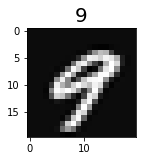

In [ ]:
#now lets show the test image and see if our model is working well
import numpy as np 
import matplotlib.pyplot as plt

#choose the index of image to show
#انتخاب شماره عکسی که میخواهیم نمایش دهیم
idx = 4600

#choose figure size
#انتخاب سایز نمودار
plt.figure(figsize=(20,2))

#convert shape of iamge from (400,) to (20, 20) and display it
plt.imshow(np.reshape(X[1:, idx], (20, 20)).T, cmap='gray')
#add the label of image as the title of figure
#لیبل عکس را به عنوان تیتر بالای تصویر چاپ کنید
plt.title(str(Y[0,idx]), fontsize = 20)

